In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from matplotlib.pyplot import figure


# Load Files
citydata = "data/city_data.csv"
rides = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(citydata)
ride_data = pd.read_csv(rides)

# Combine the data into a single dataset

merged = pd.merge(city_data, ride_data,  how='left', on="city")


# Display the data table for preview

merged.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

In [3]:
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

# Create 3 data frames based on city types - Urban, Suburban and Rural
urbandf = merged[merged["type"]=="Urban"]
surbandf = merged[merged["type"]=="Suburban"]
Ruraldf = merged[merged["type"]=="Rural"]

In [4]:
# Average Fare ($) Per City
UrbanAvfare = urbandf.groupby(['city']).mean()['fare']
SuburbanAvfare = surbandf.groupby(['city']).mean()['fare']
RuralAvfare = Ruraldf.groupby(['city']).mean()['fare']
SuburbanAvfare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [5]:
# Total Number of Rides Per City

totridesU = urbandf.groupby(['city']).count()['ride_id']
totridesS = surbandf.groupby(['city']).count()['ride_id']
totridesR = Ruraldf.groupby(['city']).count()['ride_id']
print(totridesR)

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64


In [6]:
# Total Drivers per city. .#value_counts()
totdriversU = urbandf.groupby("city")["driver_count"].value_counts()
totdriversS = surbandf.groupby("city")["driver_count"].value_counts()
totdriversR = Ruraldf.groupby("city")["driver_count"].value_counts()
print(totdriversR)

city               driver_count
Bradshawfurt       7               10
Garzaport          7                3
Harringtonfort     4                6
Jessicaport        1                6
Lake Jamie         4                6
Lake Latoyabury    2               11
Michaelberg        6               12
New Ryantown       2                6
Newtonview         1                4
North Holly        8                9
North Jaime        1                8
Penaborough        6                5
Randallchester     9                5
South Jennifer     7                7
South Marychester  1                8
South Saramouth    7                4
Taylorhaven        1                6
West Heather       4                9
Name: driver_count, dtype: int64


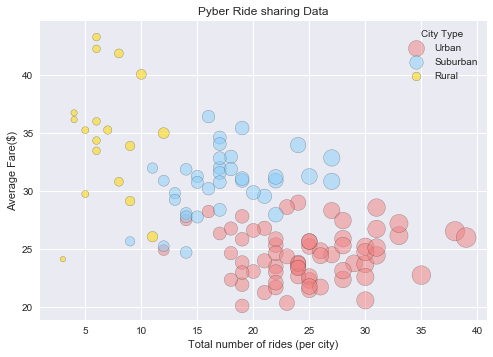

<Figure size 1440x1440 with 0 Axes>

In [15]:
# Create scatter plots for Urban, Suburban and Rural cities
plt.scatter(totridesU, UrbanAvfare , s= totdriversU*10 , marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")
plt.scatter(totridesS, SuburbanAvfare , s= totdriversS*10 , marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")
plt.scatter(totridesR, RuralAvfare , s= totdriversR*10 , marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")
plt.title("Pyber Ride sharing Data")
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average Fare($)")
plt.legend(title= 'City Type')
#figure(num=None, figsize=(20, 10))
plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
plt.style.use('seaborn')
# Save an image of the chart and print to screen
plt.savefig("images/Pyber Ride Sharing.png")
plt.show()

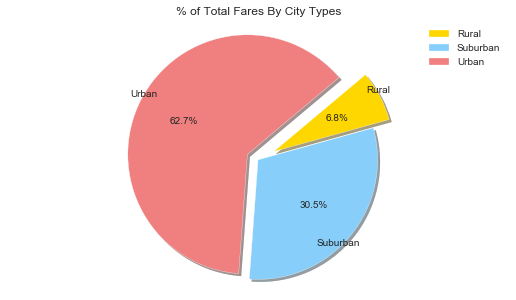

In [11]:
# Calculate Total Fare by City Type
total_fare = merged.groupby(['type'])['fare'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0.15, 0, 0.1)
plt.figure(figsize=(9,5))
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=140)
ax = plt.gca()
ax.invert_xaxis()
plt.axis("equal")
plt.legend(loc = "upper right")
plt.savefig("Images/% of Total Fares By City Types.png")
plt.show()

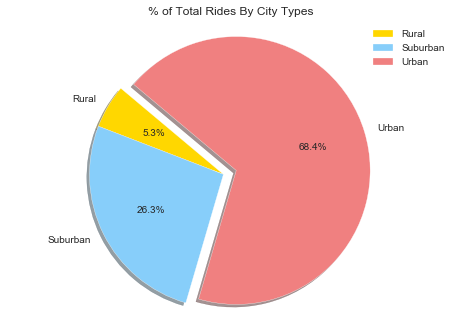

In [12]:
# Calculate Total Fare by City Type
total_rides = merged.groupby(['type'])['ride_id'].count()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.legend(loc = "upper right")
plt.savefig("Images/% of Total Rides By City Types.png")
plt.show()

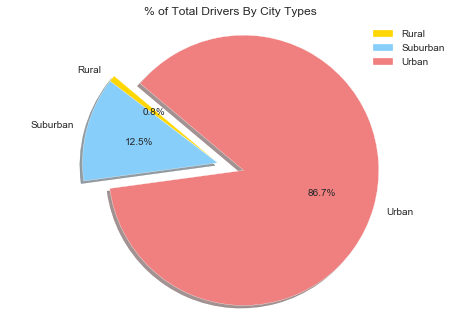

In [13]:
# Calculate Total Drivers by City Type
total_drivers = merged.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.2)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.legend(loc = "upper right")
plt.savefig("Images/% of Total Drivers By City Types.png")
plt.show()